<a href="https://colab.research.google.com/github/CocoRyse/DicomToCsv/blob/main/%D0%9C%D0%9A%D0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Необходимые процедуры и функции

In [92]:
# Загрузка библиотек в ноутбук 
!pip install pydicom


In [93]:
# Стандартные бибилиотеки
import os
import pydicom # Библиотека для чтения DICOM файлов
from collections import OrderedDict
import csv

# Визуализация (понадобится позже, пока я не разобрался как png в csv хранить)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [94]:
print('Пример всех данных из заданного DICOM файла:\n')
# тут просто путь к DICOM файлу 
example_dicom = pydicom.dcmread('/content/CR000000.dcm')
print(example_dicom)

Пример всех данных из заданного DICOM файла:

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Computed Radiography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.186081398.5076.1564393902.11925
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.4
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_364'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 144'
(0008, 0008) Image Type                          CS: ['DERIVED', 'PRIMARY']
(0008, 0013) Instance Creation Time              TM: ''
(0008, 0016) SOP Class UID                       UI: Computed Radiography Image Storage
(0008, 0018) SOP I

In [95]:
def get_tags_in_files(dicom_file_path='/content/CR000000.dcm', tag_file_path='/content/result.csv'):
    """
    Для файла с .dcm расширением находит все теги, а затем сохраняет их в качестве csv файла
    Args:
        dicom_path (str): Путь до DICOM
        tag_file_path (str): Путь до .csv с результатом
    Returns:
        dict: Словарь с выгруженными тегами
    """
    # Создаём директорию для вывода
    if not os.path.exists(os.path.dirname(tag_file_path)):
        os.makedirs(os.path.dirname(tag_file_path))

    # Получаем теги
    tags_in_files = {}
    dicom_file = pydicom.read_file(dicom_file_path)
    for item in dicom_file:

        if item.keyword not in tags_in_files:
            group = "0x%04x" % item.tag.group
            element = "0x%04x" % item.tag.element
            tags_in_files[item.keyword] = group, element, item.keyword, item.name

    # Сортируем теги
    tags_in_files = OrderedDict(
        sorted(tags_in_files.items(), key=(lambda k: (k[1][0], k[1][1])))
    )

    # Записываем теги в .csv файл
    with open(tag_file_path, "w") as f:
        writer = csv.writer(f)
        writer.writerow(["group", "element", "keyword", "name"])
        for item in tags_in_files:
            writer.writerow(tags_in_files[item])

    return tags_in_files

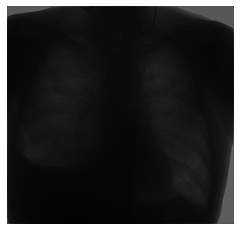

In [96]:
# Построение изображения 
def get_image(dicom_file_path='/content/CR000000.dcm', result_image_path='/content/image.png'):
    ds = pydicom.dcmread(dicom_file_path)
    plt.axis('off')
    plt.imshow(ds.pixel_array,cmap=plt.cm.gray)
    plt.savefig(result_image_path)

get_image()

In [97]:
# get_tags_in_files('/content/CR000000.dcm', '/content/result.csv')
# get_image('/content/CR000000.dcm', '/content/image.png')

# Код, который отвечает за взаимодействие с пользователем

Если вы хотите использовать имена файлов по умолчанию, то оставьте следующие инпуты пустыми
Введите путь до dicom файла, с которым хотите работать
Введите путь до файла, в который вы хотите сохранить список тегов
Введите путь до файла, в который вы хотите сохранить изображение


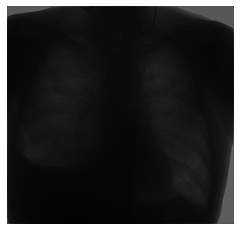

In [98]:
print('Если вы хотите использовать имена файлов по умолчанию, то оставьте следующие инпуты пустыми')
dicom_file_path = input('Введите путь до dicom файла, с которым хотите работать')
result_tag_file_path = input('Введите путь до файла, в который вы хотите сохранить список тегов')
result_image_file_path = input('Введите путь до файла, в который вы хотите сохранить изображение')

if (dicom_file_path == '' or result_tag_file_path == '' or result_image_file_path == ''):
    get_tags_in_files()
    get_image()
else:
    get_tags_in_files(dicom_file_path, result_tag_file_path)
    get_image(dicom_file_path, result_image_file_path)